<a href="https://colab.research.google.com/github/NavyaPatil1011/Deep_learning_and_gen_ai_lab/blob/main/Week3usingMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week-3:** Design Deep forward Neural Network for image classification
- Design and implement an Image classification model to classify a dataset of images using Deep
   Feed Forward NN.
- Use the MNIST datasets.
- Record the accuracy corresponding to the number of epochs 5, 50, 100.
- Repeat for CIFAR10 datasets. Note down the changes made and the accuracies obtained.


MNIST Dataset: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

CIFAR10 and CIFAR100 Datasets(University of Toronto): https://www.cs.toronto.edu/~kriz/cifar.html

CIFAR10 Dataset (Kaggle): https://www.kaggle.com/c/cifar-10/

Fashion MNIST Dataset(Kaggle): https://www.kaggle.com/datasets/zalando-research/fashionmnist

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


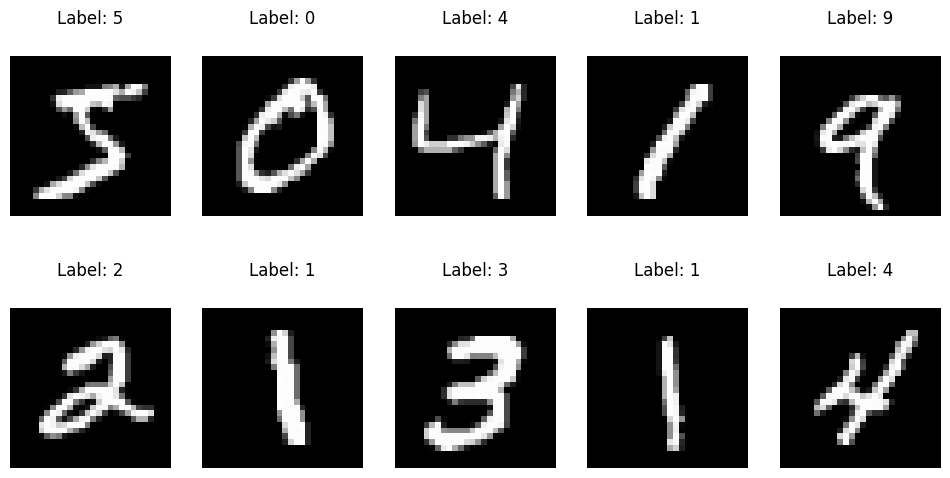

New shape of X_train: (60000, 784)
New shape of X_test: (10000, 784)
Epoch 1/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8714 - loss: 0.4132
Epoch 2/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9657 - loss: 0.1115
Epoch 3/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9752 - loss: 0.0809
Epoch 4/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9799 - loss: 0.0623
Epoch 5/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9845 - loss: 0.0477 - val_accuracy: 0.9737 - val_loss: 0.1071
Epoch 6/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9871 - loss: 0.0398
Epoch 7/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9882 - loss: 0.0362
Epoch 8/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9906 - loss: 0.0300
Epoch 9/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9921 - loss: 0.0255
Epoch 10/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9910 - l

Model: "DFF-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      1.00      0.99      5958
           3       0.99      0.99      0.99      6131
           4       1.00      1.00      1.00      5842
           5       1.00      0.99      0.99      5421
           6       0.99      1.00      1.00      5918
           7       0.99      1.00      1.00      6265
           8       0.99      0.99      0.99      5851
           9       0.99      0.99      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.9

In [6]:
# Load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load digits data (MNIST)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Display the first 10 images and their labels
fig, axs = plt.subplots(2, 5, figsize=(12, 6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].matshow(X_train[n], cmap='gray')
        axs[i, j].set_title(f"Label: {y_train[n]}")
        axs[i, j].axis('off')
        n += 1
plt.show()

# Reshape and normalize input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print new shapes
print("New shape of X_train:", X_train.shape)
print("New shape of X_test:", X_test.shape)

# Define the Deep Feedforward Neural Network architecture
model = Sequential(name="DFF-Model")
model.add(Input(shape=(784,), name='Input-Layer'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', name='Hidden-Layer-1'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', name='Hidden-Layer-2'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal', name='Hidden-Layer-3'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model on training data
model.fit(X_train, y_train,
          batch_size=10,
          epochs=100,
          validation_split=0.2,
          shuffle=True,
          validation_freq=5)

# Predict class labels
pred_labels_tr = np.argmax(model.predict(X_train), axis=1)
pred_labels_te = np.argmax(model.predict(X_test), axis=1)

# Model Summary
print("\nModel Summary")
model.summary()

# Evaluation
print("\n---------- Evaluation on Training Data -----------")
print(classification_report(y_train, pred_labels_tr))

print("\n---------- Evaluation on Test Data -----------")
print(classification_report(y_test, pred_labels_te))


To-Do:
Use the MNIST datasets.

Use the CIFAR10 datasets.

*Record the accuracy corresponding to the number of epochs 5, 50, 100.

*Repeat for CIFAR10 datasets. Note down the changes made and the accuracies obtained.

*Use the Fashion MNIST Dataset

*Perform and Plot the Comparative Analysis.
